# LAb4: Modelos polinomiais

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Duarte Gonçalves 
## Número: 46484

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab4.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Discriminantes polinomiais:
### Considere o ficheiro pickle $\texttt{Lab4-data-P1.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "data":       dados bi-dimensionais (4000 amostras)
* #### "target":     classe dos dados (inteiros de 0 a 3)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores
## a) Use os dados de treino para estimar discriminante polinomial de 4ª ordem.
## b) Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
## c) Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.
## d) Explique brevemente porque é que mais de metade dos pontos da classe "0" não são bem classificados 

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
D=pickle.load(open('Lab4-data-P1.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


## 1.a)

In [52]:
import scipy.linalg as la
from sklearn.preprocessing import PolynomialFeatures
X = D['data']
y = D['target']
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = X[:,f1]
X2 = X[:,f2]
y1 = y[f1]
y2 = y[f2]


print("X1 shape: ",X1.shape)
print("X2 shape: ",X2.shape)
print("y1 shape: ",y1.shape)
print("y2 shape: ",y2.shape)

nClasses = y.max()+1 #4 classe (0 a 3)
Y = -np.ones((nClasses,X1.shape[1])) 
for i in range(nClasses):
    Y[i,y1==i] = 1
        
poly = PolynomialFeatures(4,include_bias=False).fit(X1.T)
X1b = poly.transform(X1.T).T
X2b = poly.transform(X2.T).T
Rx = np.dot(X1b,X1b.T)
rxy = np.dot(X1b,Y.T)
w = np.dot(la.pinv(Rx),rxy)
print("\n W: \n",w)


X1 shape:  (2, 400)
X2 shape:  (2, 3600)
y1 shape:  (400,)
y2 shape:  (3600,)

 W: 
 [[ 0.08328878 -0.80916686  1.5197198  -0.41508964]
 [ 0.08461134  0.69894561  1.18894346 -1.74845158]
 [-1.49437447 -1.36221974 -0.28273896  0.41002598]
 [-0.13801843 -1.9463908   0.78980913  0.34169118]
 [-0.97753155 -0.49410159 -0.47429907 -0.04825768]
 [-0.62453757  0.47201063 -1.08937617 -0.32003061]
 [-0.15406233  0.31002216 -0.39590019  0.48950342]
 [-0.20734018 -0.02299223 -0.41915022  0.3453587 ]
 [-0.00668962 -0.13183481 -0.24289928  0.35283084]
 [ 0.06323907  0.36631542 -0.33407641 -0.29685059]
 [-0.05011188  0.58667901 -0.22853249  0.00907185]
 [ 0.32886592  0.25986986 -0.14443207 -0.0762583 ]
 [ 0.04182696  0.44643716 -0.18471073 -0.05056869]
 [ 0.22396571  0.0451194   0.05169487 -0.008979  ]]


## 1.b)

In [53]:
y1e =np.argmax(np.dot(w.T,X1b),axis=0)
y2e =np.argmax(np.dot(w.T,X2b),axis=0)

MC1 = confusion_matrix(y1,y1e)
MC2 = confusion_matrix(y2,y2e)

print("Matriz de Confusão de Treino:\n", MC1)
print("Número de Erros:", np.sum(y1!=y1e))
print()
print("Matriz de Confusão de Teste:\n", MC2)
print("Número de Erros:", np.sum(y2!=y2e))

Matriz de Confusão de Treino:
 [[ 99   0   0   1]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]
Número de Erros: 1

Matriz de Confusão de Teste:
 [[408 207  65 220]
 [  0 900   0   0]
 [  0   0 900   0]
 [  3   0   0 897]]
Número de Erros: 495


## 1.c)

(-2.8079889732151972,
 2.133456694363412,
 -2.6472927523004373,
 2.704017161488092)

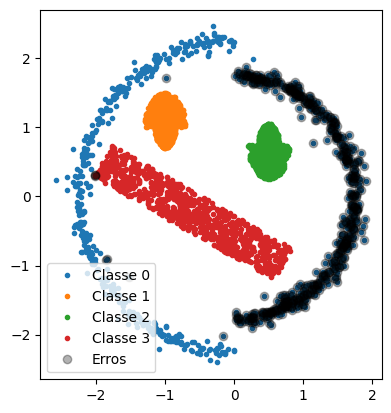

In [54]:
plt.plot(X2[0,y2==0],X2[1,y2==0],'.',label='Classe 0')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.',label='Classe 1')
plt.plot(X2[0,y2==2],X2[1,y2==2],'.',label='Classe 2')
plt.plot(X2[0,y2==3],X2[1,y2==3],'.',label='Classe 3')
plt.plot(X2[0,y2!=y2e],X2[1,y2!=y2e],'ok',alpha=0.3, label='Erros')
plt.legend()
plt.axis('scaled')

## 1.d)

Mais de metade dos pontos foram classificados erradamente, devido ao facto do classificador não ter treinado os dados para estarem designados como pertencentes a sua classe, provocando assim o sombreado a cor preta como é demonstrado na imagem acima.


<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Regressão polinomial:
### Considere o ficheiro pickle $\texttt{Lab4-data-P2.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "x":       dados uni-dimensionais/variável independente (500 pontos)
* #### "y":       variável dependente/saídas desejadas (500 pontos)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores

## a) Use os dados de treino para estimar um regressor polinomial de 5ª ordem. Imprima os valores dos pesos.
## b) Calcule o coeficiente de determinação ($\bf R^2$) para os dados de treino e para os dados de teste.
## c) Faça um "plot" do polinómio estimado. Visualize o polinómio conjutamente com os dados de teste. 
## d)  Explique brevemente porque é que o modelo não está bem adaptado aos dados de teste.

In [55]:
D=pickle.load(open('Lab4-data-P2.p','rb'))
D.keys()

dict_keys(['x', 'y', 'foldTrain', 'foldTest'])

## 2.a)

In [56]:
x = D['x']
y = D['y']
f1 = D['foldTrain']
f2 = D['foldTest']

x1 = x[f1]
x2 = x[f2]
y1 = y[f1]
y2 = y[f2]

print("x shape: ",x.shape) #unidimensional
#print("y shape: ",y.shape)
print("x1 shape: ",x1.shape) #unidimensional
print("x2 shape: ",x2.shape) #unidimensional
print()

x1 = x1[:,np.newaxis] #transforma em bidimensional
x2 = x2[:,np.newaxis] #transforma em bidimensional
print("x1 shape: ",x1.shape) #bidimensional
print("x2 shape: ",x2.shape) #bidimensional

poly = PolynomialFeatures(degree=5).fit(x1)
X1a = poly.transform(x1).T
X2a = poly.transform(x2).T
Rx = np.dot(X1a,X1a.T)
rxy = np.dot(X1a,y1.T)
w = np.dot(la.pinv(Rx),rxy)
print("Pesos w obtidos: \n",w)



x shape:  (500,)
x1 shape:  (250,)
x2 shape:  (250,)

x1 shape:  (250, 1)
x2 shape:  (250, 1)
Pesos w obtidos: 
 [ 3.94647968  1.66738131 -0.25033723 -0.45238482  0.03881964  0.00883479]


## 2.b)

In [57]:
y1e = np.dot(w.T, X1a)
y2e = np.dot(w.T, X2a)

m = np.mean(y1) #Média dos valores de y1
Vtot = np.mean((y1-m)**2) #Variância total
Pe = np.mean((y1 - y1e)**2) #Potencia do erro
R2_treino = 1-Pe/Vtot

m = np.mean(y2) #Média dos valores de y2
Vtot = np.mean((y2-m)**2) #Variância total
Pe = np.mean((y2 - y2e)**2) #Potencia do erro
R2_teste = 1-Pe/Vtot

print('Valor de R2 de Treino: ',R2_treino)
print('Valor de R2 de Teste: ',R2_teste)

Valor de R2 de Treino:  0.9611632423555129
Valor de R2 de Teste:  -4.295877410752959


## 2.c)

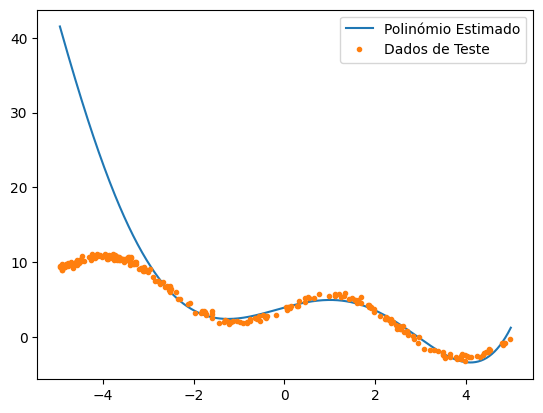

In [58]:
t = np.linspace(x.min(),x.max(),500)
tp = poly.transform(t[:,np.newaxis]).T
yt = np.dot(w,tp)

plt.plot(t,yt,label='Polinómio Estimado')
plt.plot(x2,y2,'.',label='Dados de Teste')
plt.legend()
plt.show()

## 2.d)

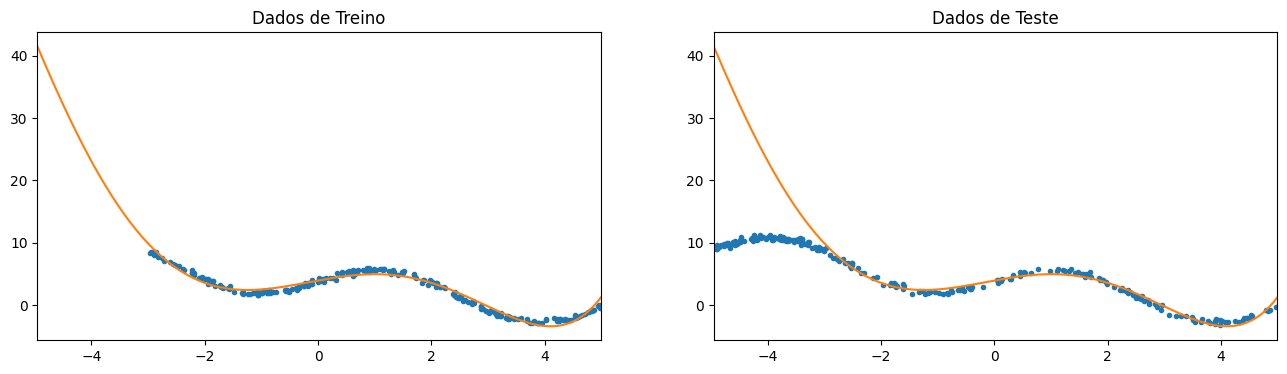

In [59]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title('Dados de Treino')
plt.xlim((x.min(),x.max()))
plt.plot(x1,y1, '.')
plt.plot(t,yt)

plt.subplot(122)
plt.title('Dados de Teste')
plt.xlim((x.min(),x.max()))
plt.plot(x2, y2, '.')
plt.plot(t,yt)

Através da comparação feita nos gráficos em cima, podemos verificar que ambos os dado apresentam gráficos semelhantes e apenas difere nos dados de teste onde este apresenta mais dados que se encontram fora do polinómio (Dados mais à esquerda).
Isto deve-se pelo facto de que estes dados não foram treinados.